# CHAPTER 5
**Supervised Learning Using PyTorch**

In [1]:
import torch
import sklearn
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

torch.manual_seed(1)

## Recipe 5-1. Data Preparation for the Supervised Model

In [2]:
df = pd.read_csv("data/mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
x = torch.unsqueeze(torch.from_numpy(np.array(df.mpg)), dim=1)
y = torch.unsqueeze(torch.from_numpy(np.array(df.qsec)), dim=1)

## Recipe 5-2. Forward and Backward Propagation

In [4]:
class Net(nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        
        self.predict = nn.Sequential(
            nn.Linear(n_features, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        )
    
    def forward(self, x):
        out = self.predict(x)
        return out

In [5]:
net = Net(1, 20, 1)
net.double()
print(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_fn = nn.MSELoss()

Net(
  (predict): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=1, bias=True)
  )
)


## Recipe 5-3. Optimization and Gradient Computation

loss = 3.0933796874999993


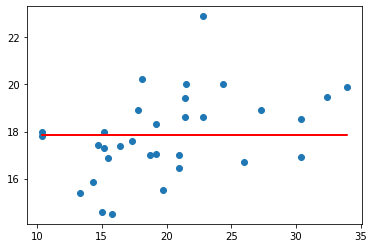

In [6]:
for epoch in range(1000):
    pred = net(x)
    loss = loss_fn(y, pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("loss = {}".format(loss))
plt.figure()
plt.scatter(x, y)
plt.plot(x, pred.detach().numpy(), 'r-')
plt.show()

## Recipe 5-4. Viewing Predictions

## Recipe 5-5. Supervised Model Logistic Regression

In [7]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.LongTensor)

x = Variable(x)
y = Variable(y)

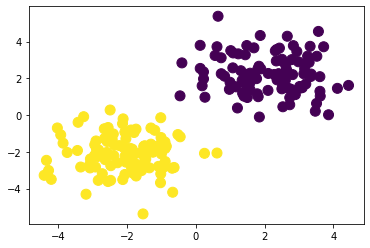

In [8]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, s=100)
plt.show()

In [9]:
class Classification(nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Classification, self).__init__()
        
        self.predict = nn.Sequential(
            nn.Linear(n_features, n_hidden),
            nn.Sigmoid(),
            nn.Linear(n_hidden, n_output)
        )
    
    def forward(self, x):
        out = self.predict(x)
        return out

In [10]:
classifier = Classification(2, 10, 2)
print(classifier)

optimizer = torch.optim.SGD(classifier.parameters(), lr=0.02)
loss_fn = nn.CrossEntropyLoss()

Classification(
  (predict): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
)


Accuracy = 199 / 200


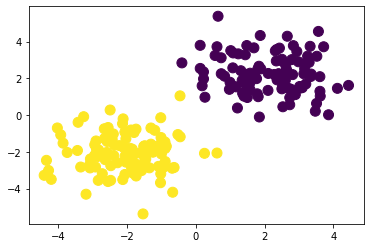

In [11]:
for epoch in range(100):
    y_pred = classifier(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = torch.max(
    nn.functional.softmax(classifier(x), dim=1),
    dim=1
)
print("Accuracy = {} / {}".format((y_pred[1] == y).sum(), 200))
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y_pred[1], s=100)
plt.show()